In [1]:
#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import warnings

In [2]:
warnings.simplefilter("ignore")

In [3]:
#load data
data = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')

In [4]:
data.head(10)

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   
5    6    16420           0          1          1          1            0   
6    7    84914           0          3          1          1        27482   
7    8    20856           0          1          1          1         5250   
8    9   443003           0          3          2          1         1753   
9   10   104860           0          3          1          1        28426   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  
5            0                  0                0               6942       0  
6           25                  0                0               6994       0  
7            4                250                1               6938       1  
8           43               3850               12               6948       1  
9           28               1150                3               6931       1

In [5]:
data.tail(10)

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
3989  4012     2622           0          1          1          1         1625   
3990  4013    11310           0          1          1          1         5021   
3991  4014    39142           0          3          1          1        14981   
3992  4015    11181           0          1          1          1          929   
3993  4016     3974           0          1          1          1          365   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
3989            6                  0                0               1404   
3990            2                  0                0               1409   
3991           28                  0                0               1408   
3992           12                  0                0               1407   
3993            3                  0                0               1397   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
3989       1  
3990       0  
3991       0  
3992       0  
3993       0  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
data.shape

(3999, 12)

In [8]:
data.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [9]:
data.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

In [10]:
data[data.duplicated()] #duplicates

Empty DataFrame
Columns: [ID#, Balance, Qual_miles, cc1_miles, cc2_miles, cc3_miles, Bonus_miles, Bonus_trans, Flight_miles_12mo, Flight_trans_12, Days_since_enroll, Award?]
Index: []

In [11]:
# Drop 'Award?' and 'ID#' columns
data = data.drop(columns=['Award?', 'ID#'])

# Display the first few rows to confirm
data.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   
2    41354           0          1          1          1         4123   
3    14776           0          1          1          1          500   
4    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  
0            1                  0                0               7000  
1            2                  0                0               6968  
2            4                  0                0               7034  
3            1                  0                0               6952  
4           26               2077                4               6935

In [12]:
#checking null values
data.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
dtype: int64

<Axes: >

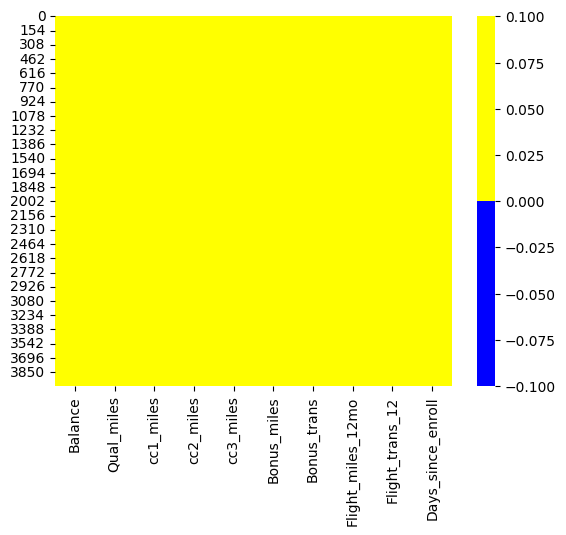

In [13]:
cols = data.columns
colours = ['blue', 'yellow']
sns.heatmap(data[cols].isnull(),
            cmap=colours)

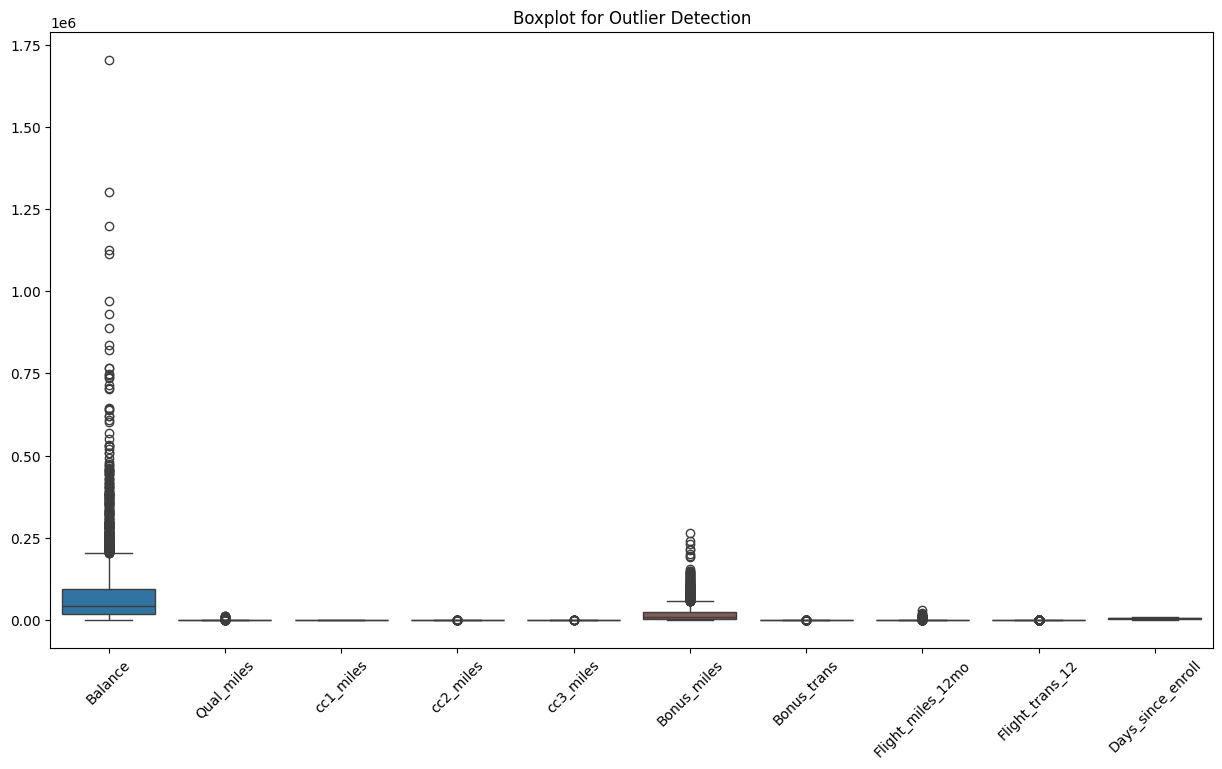

In [14]:
#checking for outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data)
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

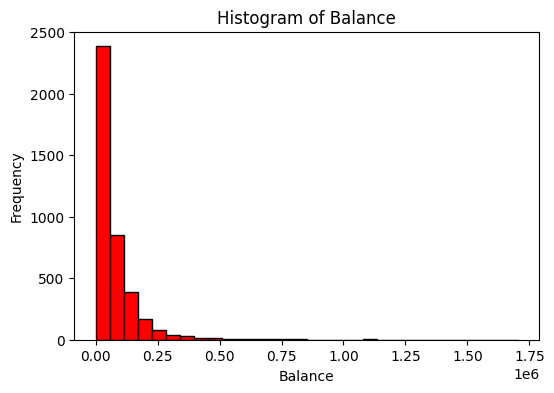

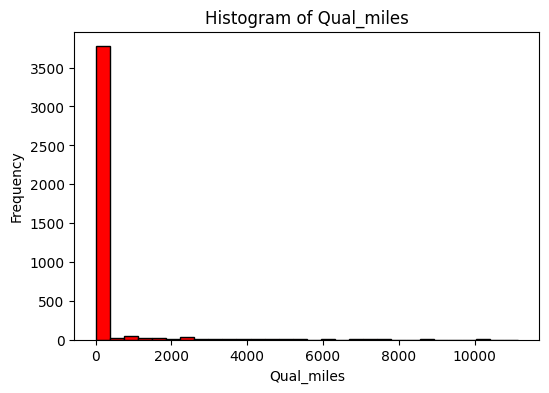

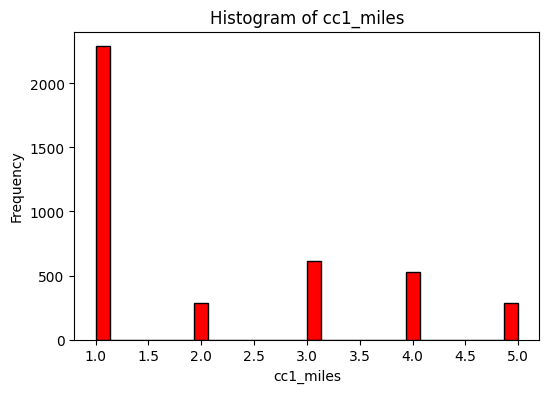

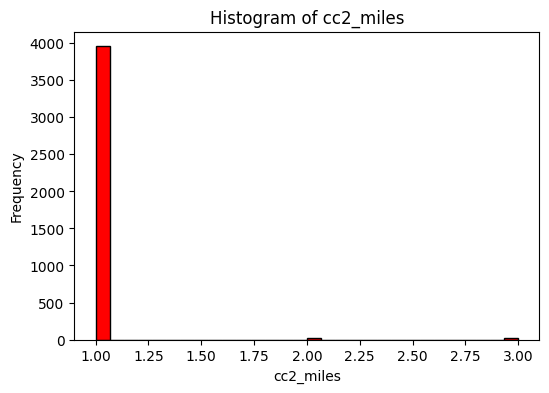

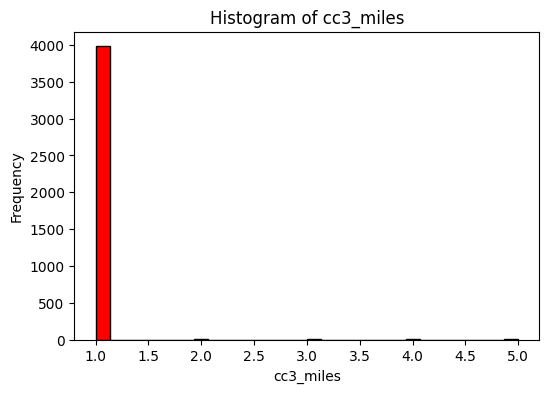

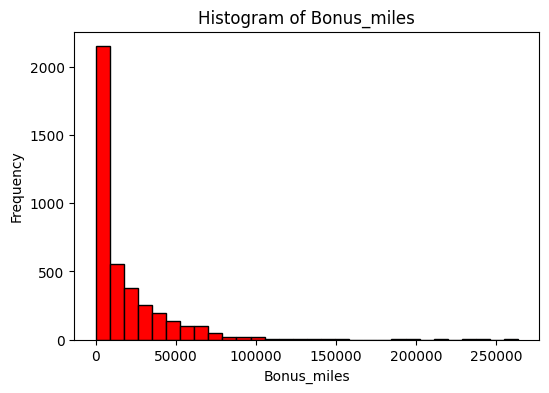

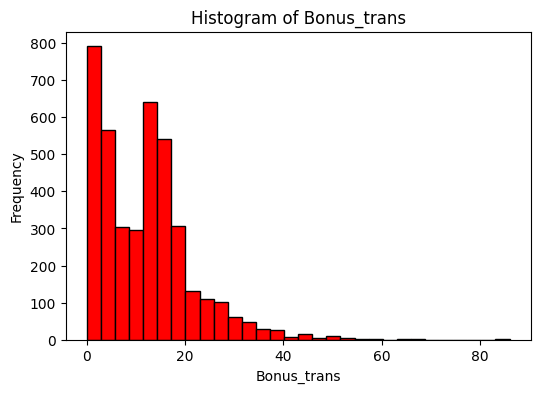

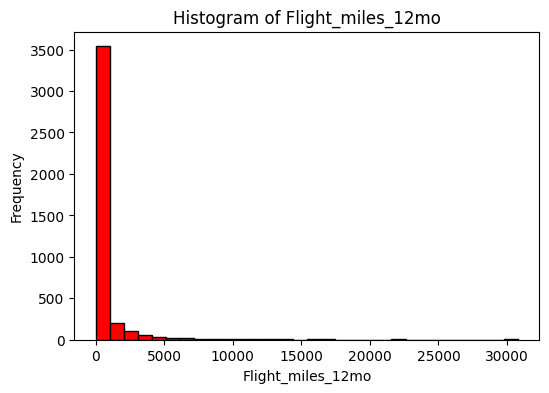

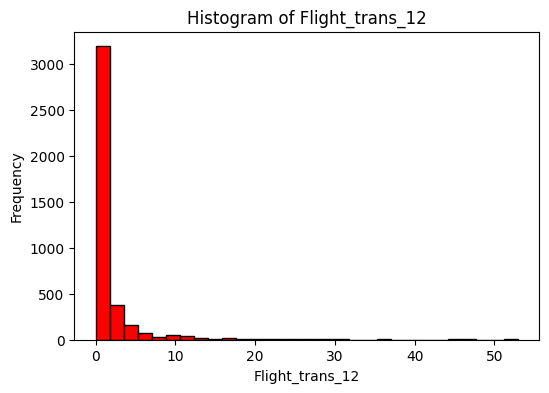

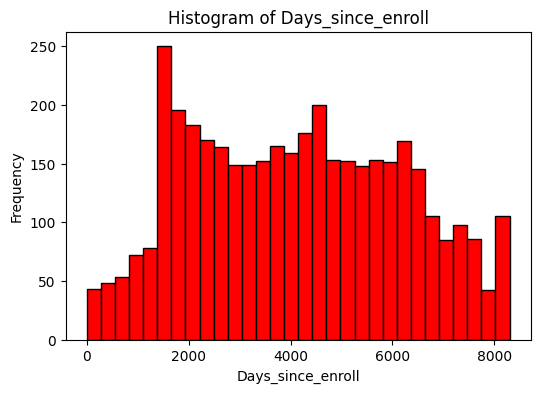

In [15]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=['int64']).columns

# Ploting histograms for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(data[col], bins=30, color='red', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {col}")
    plt.show()

# Treating Outliers

[0.0, 202636.0]

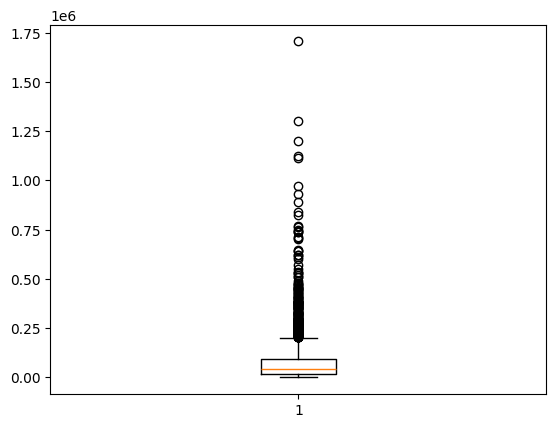

In [16]:
box_Balance=plt.boxplot(data['Balance'])
[item.get_ydata()[1] for item in box_Balance['whiskers']]

In [17]:
data.loc[data.Balance>202636.0,"Balance"]=202636.0 #upper extreme
data.loc[data.Balance<3.0,"Balance"]=0.0#lower extreme

{'whiskers': [<matplotlib.lines.Line2D at 0x7ee1308fea10>,
 'caps': [<matplotlib.lines.Line2D at 0x7ee1309081d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ee1308d8190>],
 'medians': [<matplotlib.lines.Line2D at 0x7ee130909810>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ee13090a210>],
 'means': []}

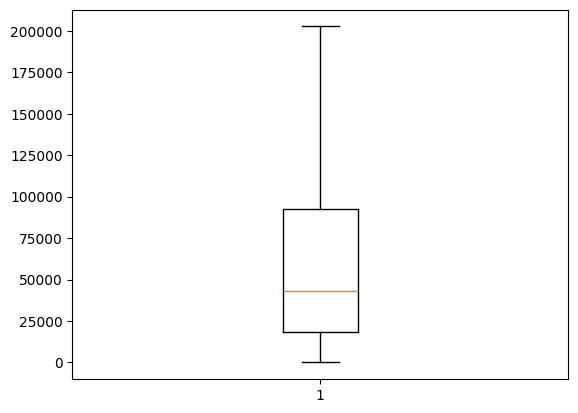

In [18]:
plt.boxplot(data['Balance'])

[0.0, 0.0]

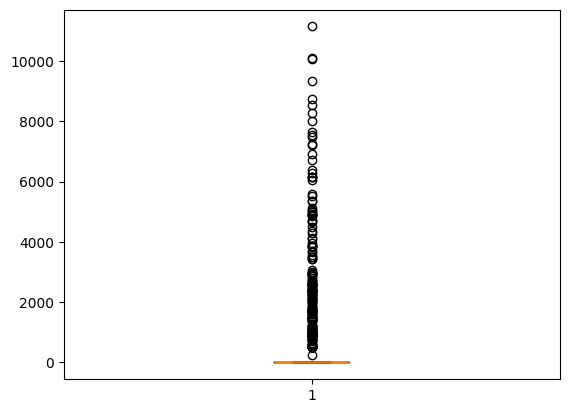

In [19]:
box_Qual_miles=plt.boxplot(data['Qual_miles'])
[item.get_ydata()[1] for item in box_Qual_miles['whiskers']]

In [20]:
data.loc[data.Qual_miles>0.0,"Qual_miles"]=0.0 #upper extreme

{'whiskers': [<matplotlib.lines.Line2D at 0x7ee1307cee10>,
 'caps': [<matplotlib.lines.Line2D at 0x7ee1307d8490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ee1307ce1d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ee130a7c950>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ee130a3f790>],
 'means': []}

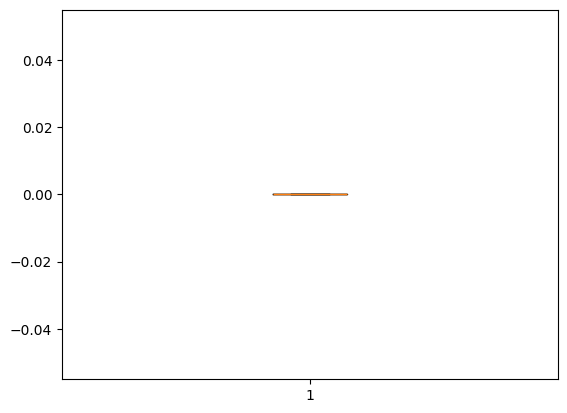

In [21]:
plt.boxplot(data['Qual_miles'])

[1.0, 1.0]

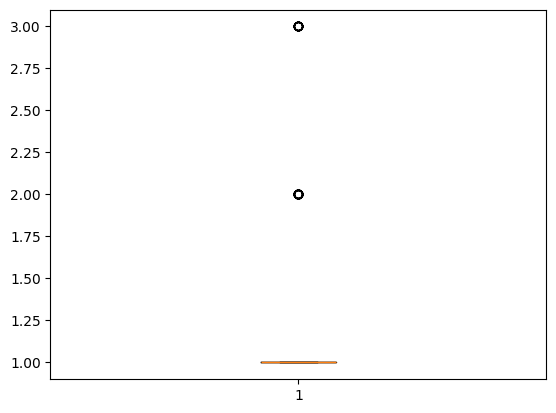

In [22]:
box_cc2_miles=plt.boxplot(data['cc2_miles'])
[item.get_ydata()[1] for item in box_cc2_miles['whiskers']]

In [23]:
data.loc[data.cc2_miles>1.0,"cc2_miles"]=1.0 #upper extreme

{'whiskers': [<matplotlib.lines.Line2D at 0x7ee1327848d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ee132786c90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ee132784210>],
 'medians': [<matplotlib.lines.Line2D at 0x7ee13276d950>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ee13276ce10>],
 'means': []}

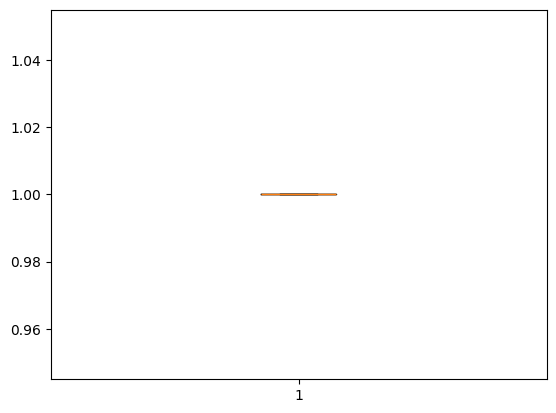

In [24]:
plt.boxplot(data['cc2_miles'])

[1.0, 1.0]

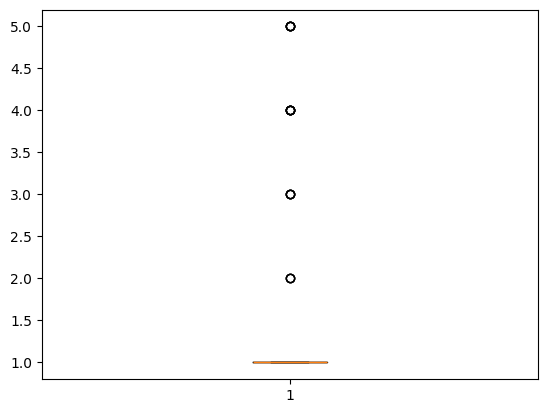

In [25]:
box_cc3_miles=plt.boxplot(data['cc3_miles'])
[item.get_ydata()[1] for item in box_cc3_miles['whiskers']]

In [26]:
data.loc[data.cc3_miles>1.0,"cc3_miles"]=1.0 #upper extreme

{'whiskers': [<matplotlib.lines.Line2D at 0x7ee1328d9b10>,
 'caps': [<matplotlib.lines.Line2D at 0x7ee1328d90d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ee1328dba10>],
 'medians': [<matplotlib.lines.Line2D at 0x7ee1328ae4d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ee1328ad5d0>],
 'means': []}

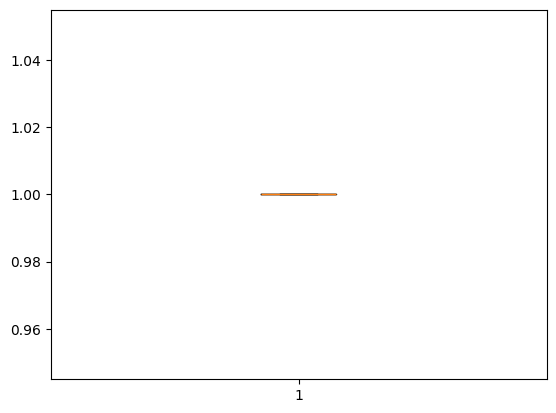

In [27]:
plt.boxplot(data['cc3_miles'])

[0.0, 57505.0]

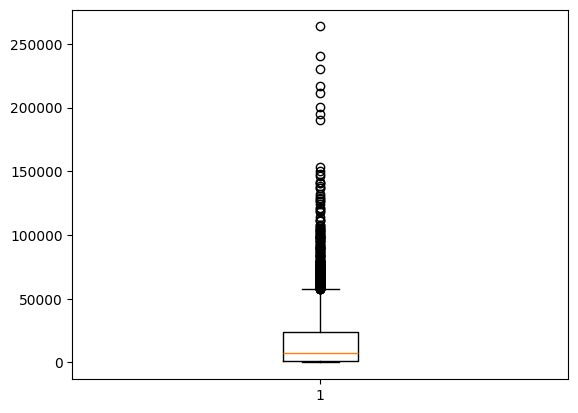

In [28]:
box_Bonus_miles=plt.boxplot(data['Bonus_miles'])
[item.get_ydata()[1] for item in box_Bonus_miles['whiskers']]

In [29]:
data.loc[data.Bonus_miles>57505.0,"Bonus_miles"]=57505.0 #upper extreme

{'whiskers': [<matplotlib.lines.Line2D at 0x7ee1329d3210>,
 'caps': [<matplotlib.lines.Line2D at 0x7ee132992010>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ee132991150>],
 'medians': [<matplotlib.lines.Line2D at 0x7ee132991510>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ee132984c50>],
 'means': []}

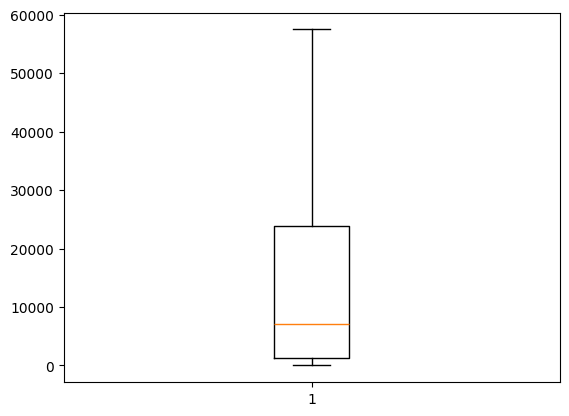

In [30]:
plt.boxplot(data['Bonus_miles'])

[0.0, 38.0]

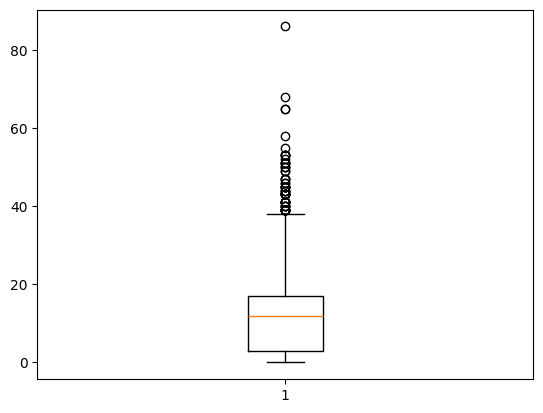

In [31]:
box_Bonus_trans=plt.boxplot(data['Bonus_trans'])
[item.get_ydata()[1] for item in box_Bonus_trans['whiskers']]

In [32]:
data.loc[data.Bonus_trans>38.0,"Bonus_trans"]=38.0 #upper extreme

{'whiskers': [<matplotlib.lines.Line2D at 0x7ee132ad7d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7ee132ac2910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ee132ad5dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ee132ac1e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ee132ac39d0>],
 'means': []}

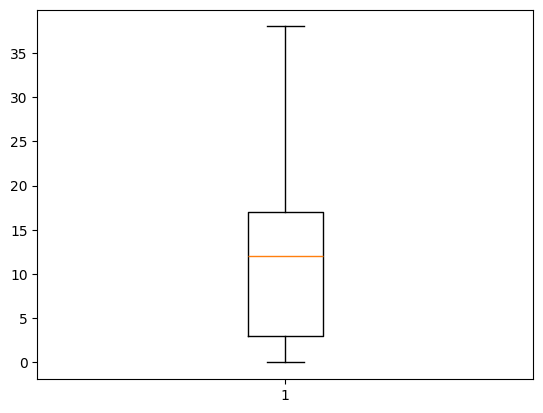

In [33]:
plt.boxplot(data['Bonus_trans'])

[0.0, 767.0]

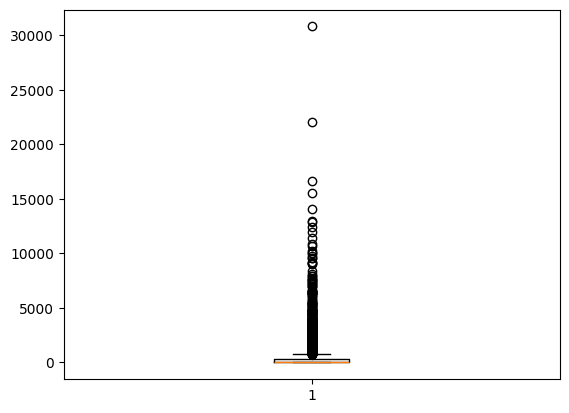

In [34]:
box_Flight_miles_12mo=plt.boxplot(data['Flight_miles_12mo'])
[item.get_ydata()[1] for item in box_Flight_miles_12mo['whiskers']]

In [35]:
data.loc[data.Flight_miles_12mo>767.0,"Flight_miles_12mo"]=767.0 #upper extreme

{'whiskers': [<matplotlib.lines.Line2D at 0x7ee132a42910>,
 'caps': [<matplotlib.lines.Line2D at 0x7ee132a47f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ee132a12b90>],
 'medians': [<matplotlib.lines.Line2D at 0x7ee132a44ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ee132a47dd0>],
 'means': []}

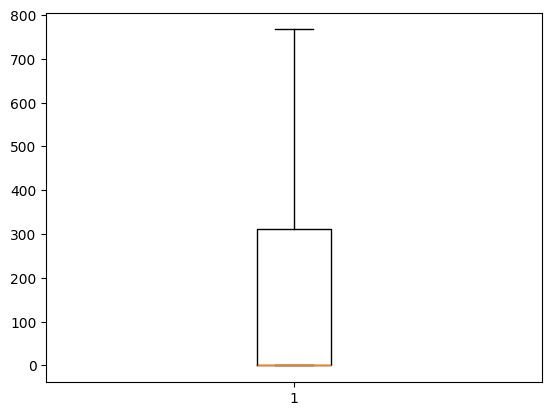

In [36]:
plt.boxplot(data['Flight_miles_12mo'])

[0.0, 2.0]

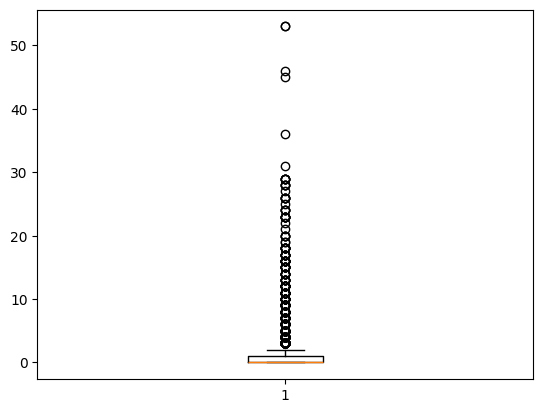

In [37]:
box_Flight_trans_12=plt.boxplot(data['Flight_trans_12'])
[item.get_ydata()[1] for item in box_Flight_trans_12['whiskers']]

In [38]:
data.loc[data.Flight_trans_12>2.0,"Flight_trans_12"]=2.0 #upper extreme

{'whiskers': [<matplotlib.lines.Line2D at 0x7ee1328066d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ee132807ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ee132805ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ee132845710>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ee132846110>],
 'means': []}

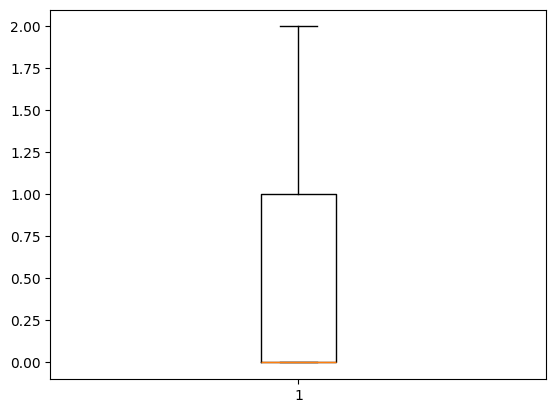

In [39]:
plt.boxplot(data['Flight_trans_12'])

In [40]:
from scipy.stats.mstats import winsorize

data_winsorized = data.copy()
for col in data.columns:
    data_winsorized[col] = winsorize(data[col], limits=[0.05, 0.05])  # Trim 5% on both sides

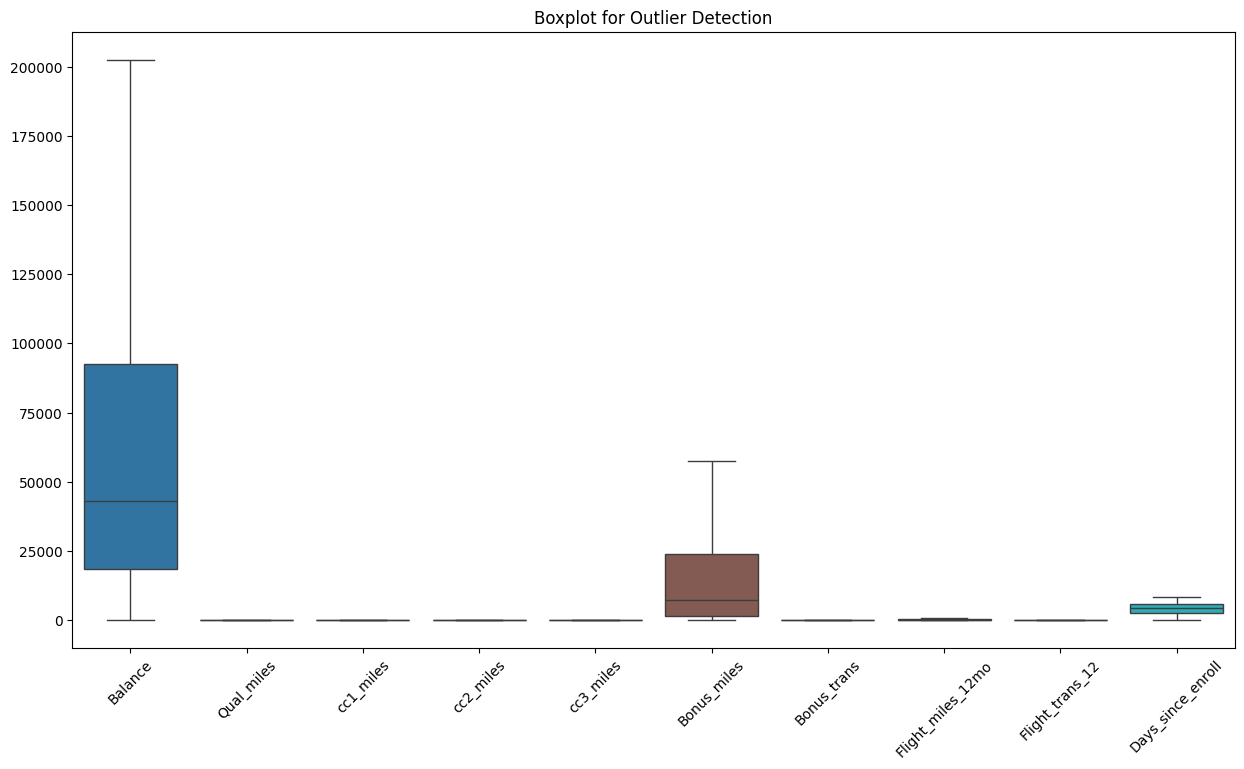

In [41]:
#checking for outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data)
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

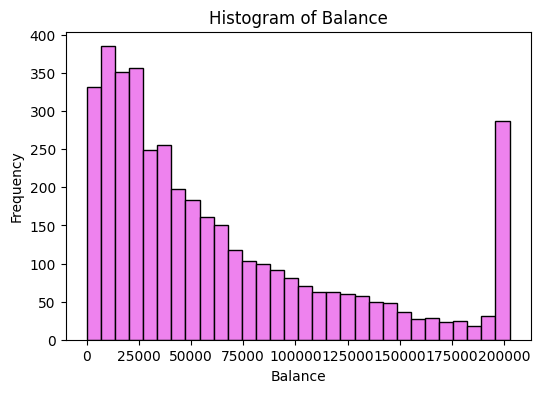

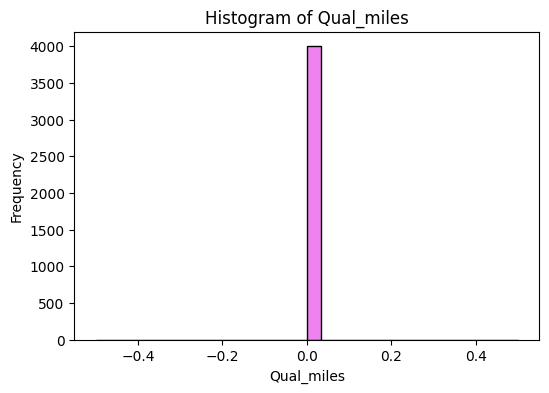

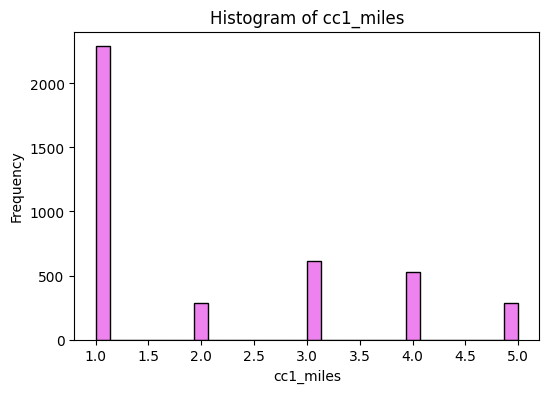

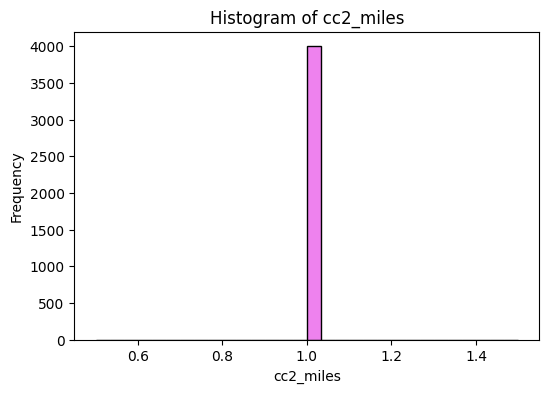

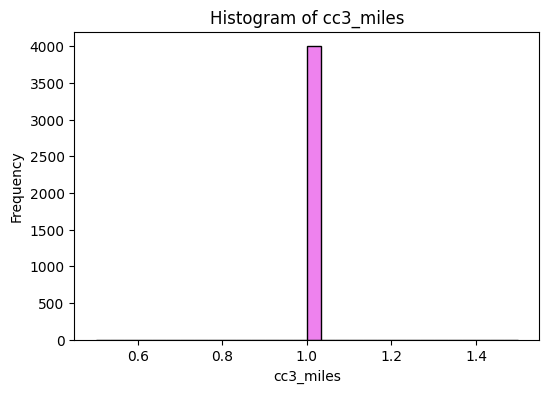

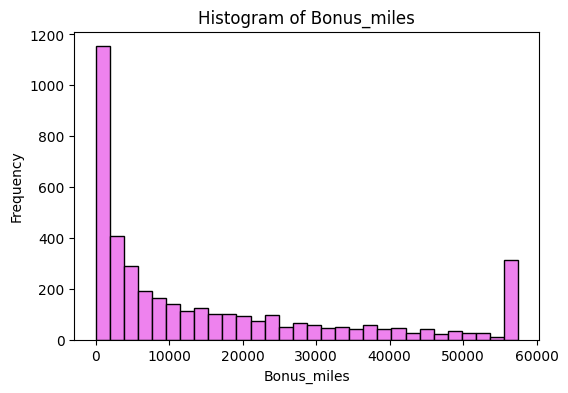

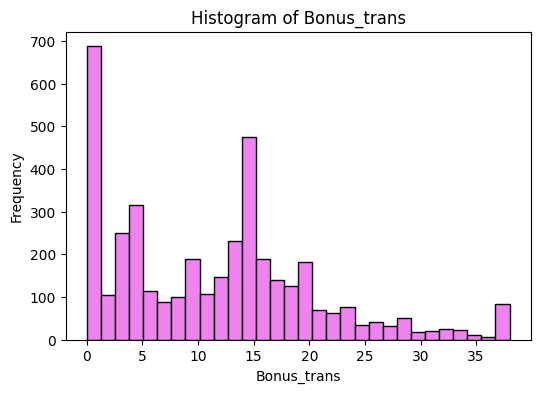

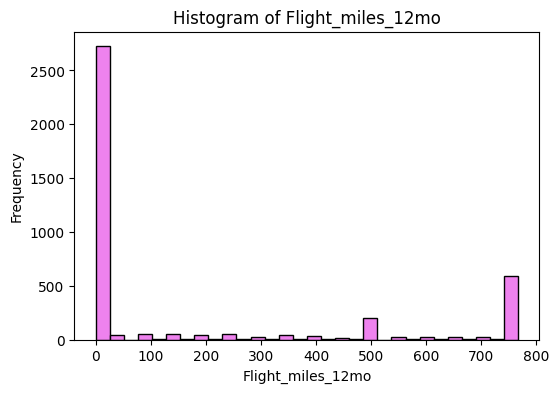

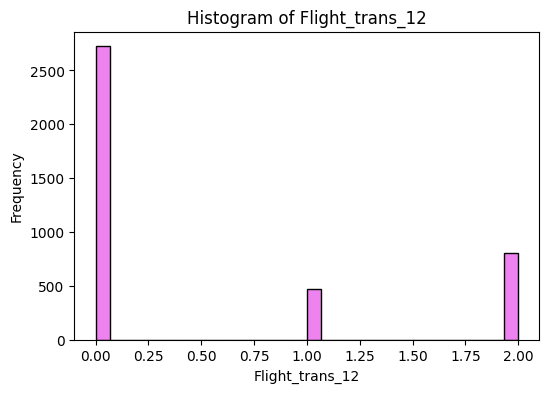

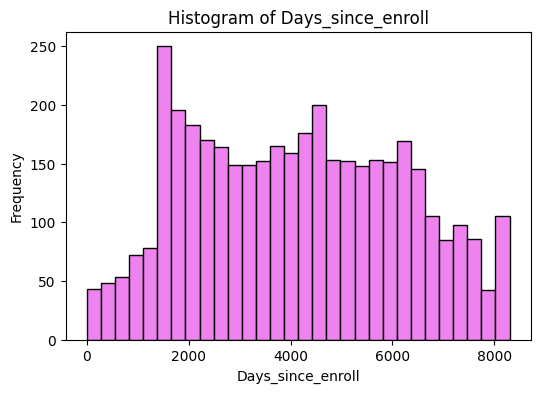

In [42]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=['int64']).columns

# Ploting histograms for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(data[col], bins=30, color='violet', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {col}")
    plt.show()

# correaltion matrix

In [43]:
# Identify columns with a single unique value (constant columns)
constant_columns = [col for col in data.columns if data[col].nunique() == 1]

# Display the columns with constant values
print("Columns with a single unique value:", constant_columns)

# Drop constant columns
data_cleaned = data.drop(columns=constant_columns)


Columns with a single unique value: ['Qual_miles', 'cc2_miles', 'cc3_miles']


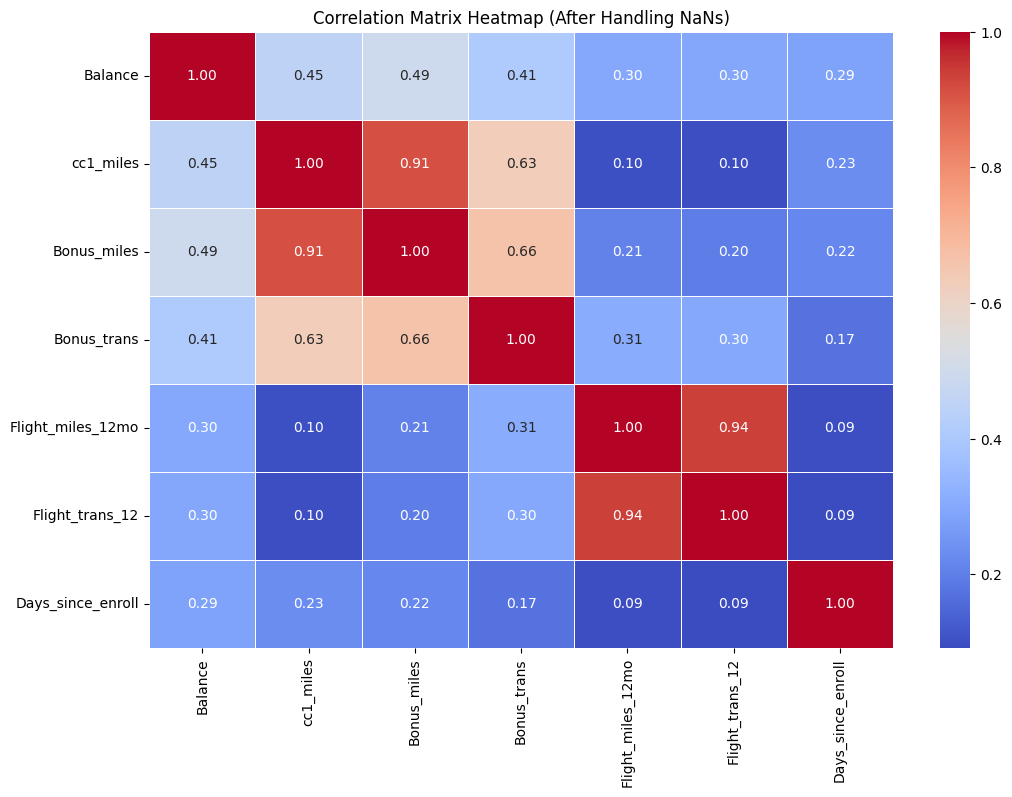

In [44]:
# Compute correlation matrix after dropping constant columns
correlation_matrix = data_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap (After Handling NaNs)")
plt.show()


#Scatterplot between variables along with histograms

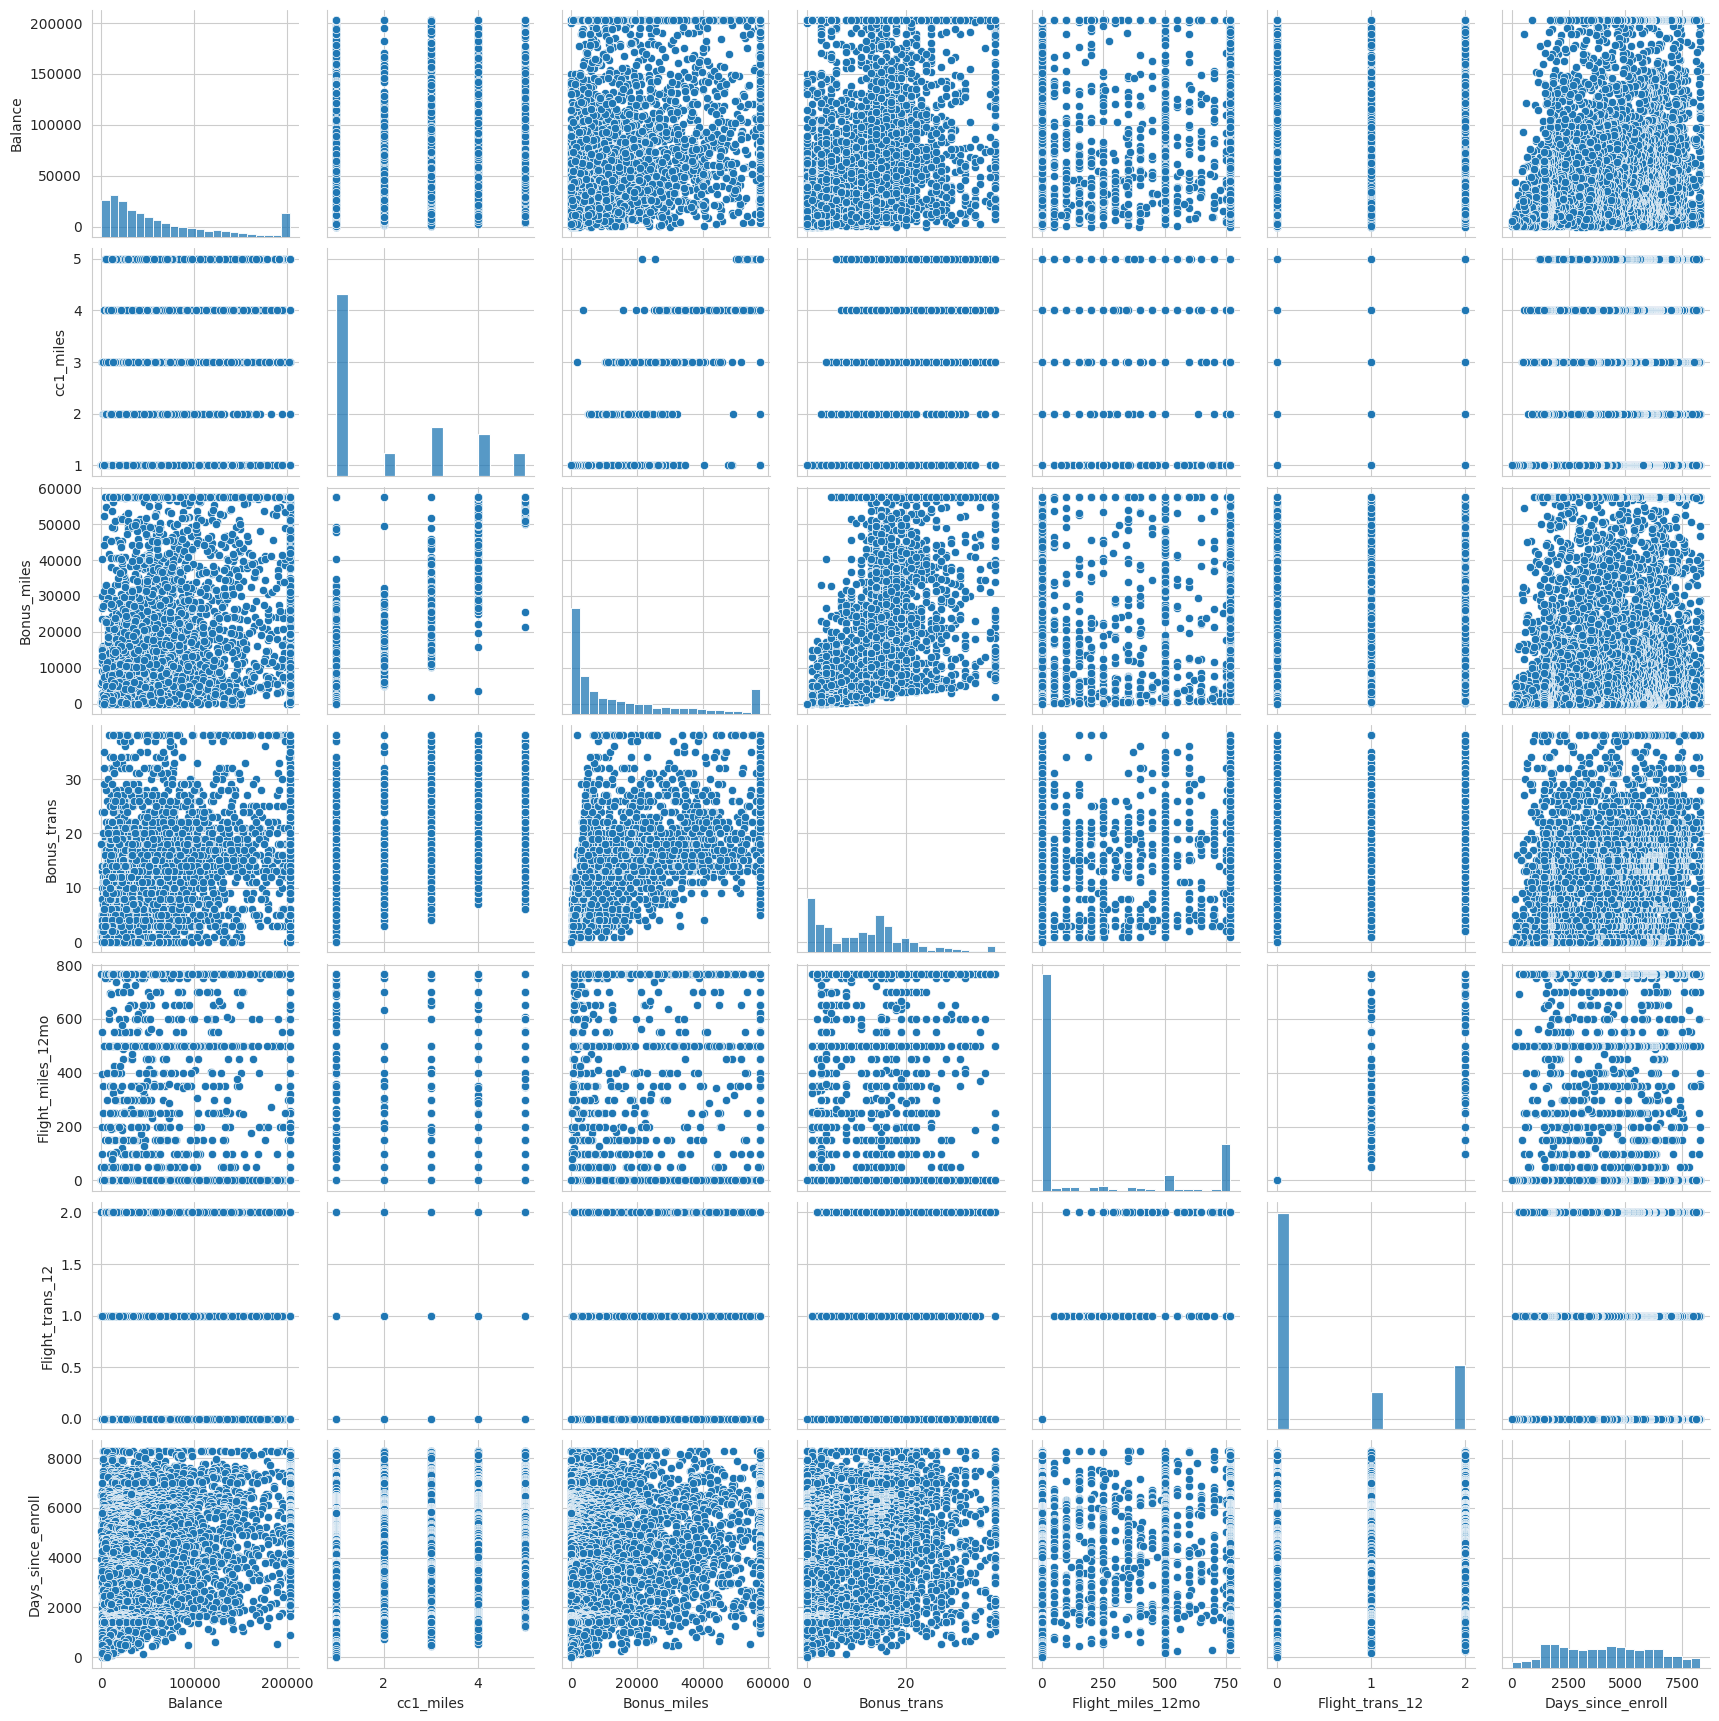

In [45]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='whitegrid')
sns.pairplot(data_cleaned)

# Standardizing

In [46]:
from sklearn.preprocessing import StandardScaler


In [47]:
# Standardizing the cleaned data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned)


In [48]:
# Convert the scaled data back to a Pandas DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data_cleaned.columns)

# Now you can use .head()
print(scaled_df.head())


    Balance  cc1_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
0 -0.607551  -0.769578    -0.843546    -1.148854          -0.605474   
1 -0.759477  -0.769578    -0.841275    -1.039133          -0.605474   
2 -0.382008  -0.769578    -0.624797    -0.819689          -0.605474   
3 -0.835756  -0.769578    -0.825487    -1.148854          -0.605474   
4  0.580837   1.409471     1.545355     1.594189           2.024761   

   Flight_trans_12  Days_since_enroll  
0        -0.644505           1.395454  
1        -0.644505           1.379957  
2        -0.644505           1.411920  
3        -0.644505           1.372208  
4         1.830172           1.363975  


# PCA for high correlation"

In [49]:
from sklearn.decomposition import PCA

In [50]:
# Apply PCA
pca = PCA(n_components=None)  # None means it will keep all components initially
pca_data = pca.fit_transform(scaled_df)

In [51]:
# Explained Variance Ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)  # Cumulative variance explained

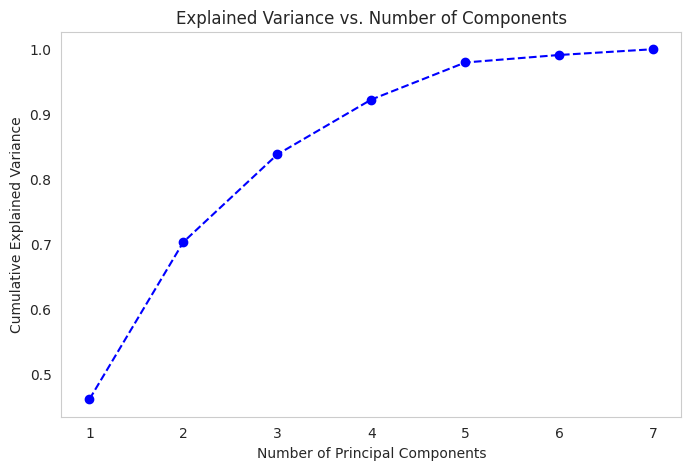

In [52]:
# Plot Explained Variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.grid()
plt.show()

In [53]:
# Apply PCA with optimal number of components
pca = PCA(n_components=5)  # 5 components
pca_final = pca.fit_transform(scaled_df)

In [54]:
# Convert back to DataFrame
pca_df = pd.DataFrame(pca_final, columns=[f'PC{i+1}' for i in range(5)])

In [55]:
# Check the transformed data
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5
0 -1.590339 -0.209026  1.699697 -0.441515 -0.250986
1 -1.602683 -0.216501  1.623413 -0.597457 -0.180246
2 -1.252176 -0.320509  1.657619 -0.351304 -0.028385
3 -1.674194 -0.205137  1.619172 -0.635970 -0.285951
4  3.766971  1.059457  0.378621 -1.036699 -0.128434


# K-mean clustering

In [56]:
# Normalization function
def norm_func(i):
    x = (i - i.min()) / (i.max() - i.min())
    return x

In [57]:
# Normalizing the data
pca_norm = norm_func(pca_df.iloc[:, :])
pca_norm.head()

PC1       PC2       PC3       PC4       PC5
0  0.110082  0.425070  0.773179  0.409060  0.361900
1  0.108596  0.423805  0.760140  0.382589  0.375696
2  0.150803  0.406205  0.765987  0.424373  0.405313
3  0.099985  0.425728  0.759415  0.376051  0.355080
4  0.755197  0.639723  0.547379  0.308027  0.385801

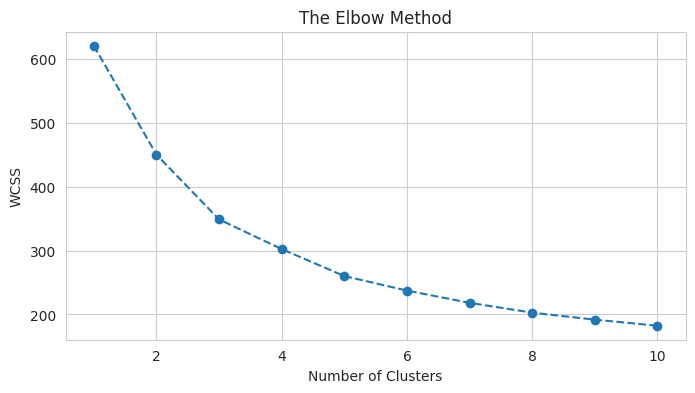

In [58]:
fig = plt.figure(figsize=(8, 4))
WCSS = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, random_state=42, n_init=10).fit(pca_norm)
    WCSS.append(model.inertia_)

plt.plot(range(1, 11), WCSS, marker="o", linestyle="dashed")
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [59]:
# Choosing k=4 (or jo elbow method se best ho)
clf = KMeans(n_clusters=4, random_state=42, n_init=10)
clf.fit(pca_norm)


KMeans(n_clusters=4, n_init=10, random_state=42)

In [60]:
#Predicting cluster labels
y_names = clf.predict(pca_norm)

In [61]:
#Adding clusters to PCA DataFrame
pca_norm["clust"] = y_names
pca_df["clust"] = y_names



In [62]:
pca_norm.iloc[:, :-1].groupby(pca_norm.clust).mean()

PC1       PC2       PC3       PC4       PC5
clust                                                  
0      0.571569  0.256658  0.450986  0.486951  0.348726
1      0.195302  0.390982  0.649708  0.449614  0.436591
2      0.138052  0.424505  0.365861  0.513360  0.430358
3      0.428314  0.815054  0.486029  0.478419  0.409155

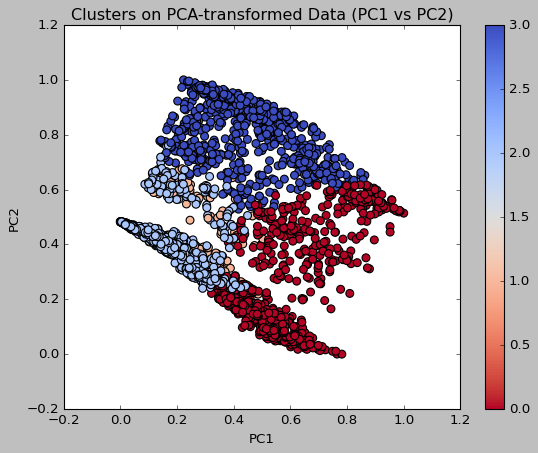

In [63]:
# Scatter plot of clusters
plt.style.use('classic')
pca_norm.plot("PC1", "PC2", c=clf.labels_, kind="scatter", s=50, cmap=plt.cm.coolwarm_r)
plt.title("Clusters on PCA-transformed Data (PC1 vs PC2)")
plt.show()

#Conclusion
**The K-Means clustering process was successfully implemented, leading to well-defined clusters.**
**The results indicate that the data can be effectively grouped based on underlying patterns.**
**Further analysis can be done to interpret the significance of each cluster in a real-world context.**

# Hierarchical Clustering

In [64]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [65]:
# Ward linkage for hierarchical clustering
linkage_matrix_ward = sch.linkage(pca_norm.iloc[:, :-1], method='ward')

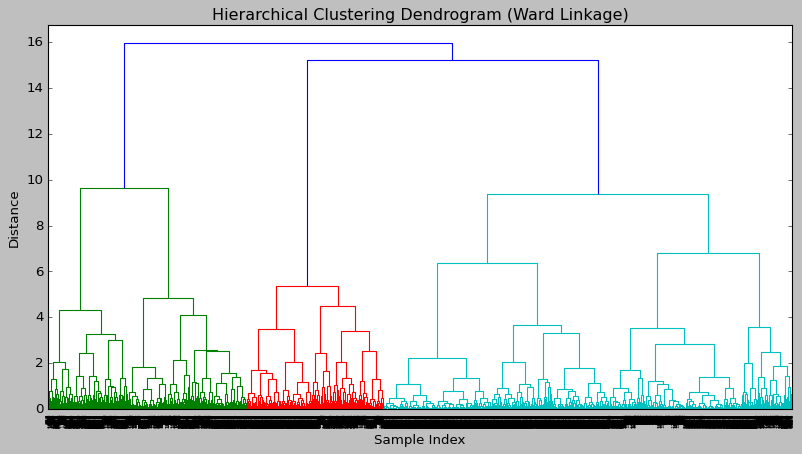

In [66]:
# Plot dendrogram
plt.figure(figsize=(12, 6))
sch.dendrogram(linkage_matrix_ward)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

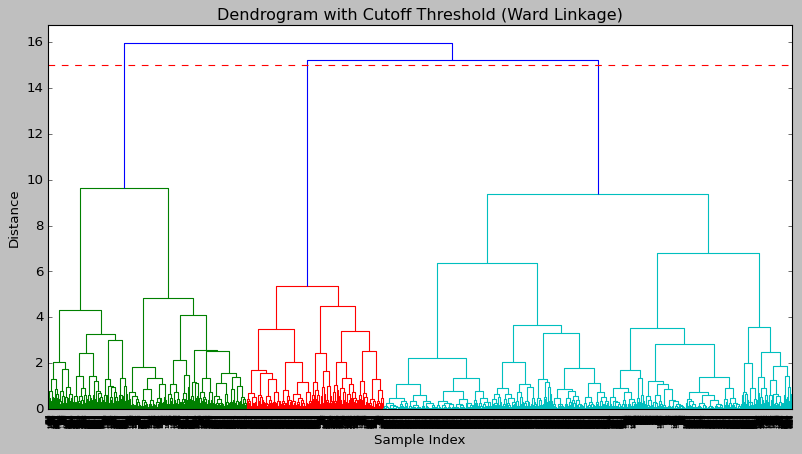

In [67]:
plt.figure(figsize=(12, 6))
dend = sch.dendrogram(linkage_matrix_ward)
plt.axhline(y=15, color='r', linestyle='--')  # set Cutoff
plt.title("Dendrogram with Cutoff Threshold (Ward Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [68]:
# Apply Hierarchical Clustering (Agglomerative)
hc_ward = AgglomerativeClustering(n_clusters=4, linkage='ward', metric='euclidean')

In [69]:
# Fit and predict clusters
y_hc_ward = hc_ward.fit_predict(pca_norm.iloc[:, :-1])
pca_norm["cluster_id_ward"] = y_hc_ward

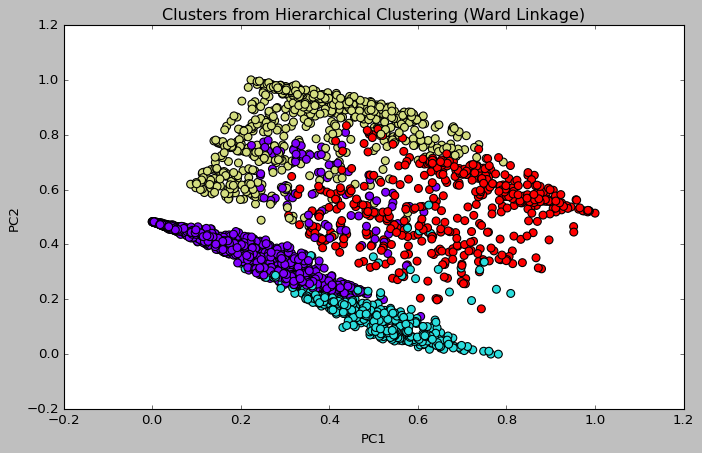

In [70]:
# Scatter plot of clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_norm["PC1"], pca_norm["PC2"], c=pca_norm["cluster_id_ward"], cmap="rainbow", edgecolors="k", s=50)
plt.title("Clusters from Hierarchical Clustering (Ward Linkage)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [71]:
# Fit and predict clusters
c = AgglomerativeClustering(n_clusters=4, linkage='ward')  # Assuming 4 clusters and Ward linkage

In [72]:
# Now fit and predict using the c object (was hc)
y_hc = c.fit_predict(pca_norm.iloc[:, :-1])
pca_norm["cluster_id"] = y_hc

In [73]:
# Display cluster assignment
print(pca_norm["cluster_id"].value_counts())

cluster_id
2    1307
3    1054
0     825
1     813
Name: count, dtype: int64


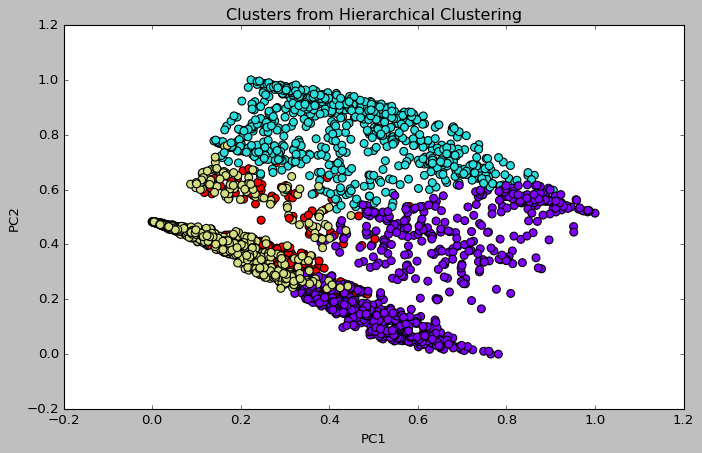

In [74]:
# Scatter plot of clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_norm["PC1"], pca_norm["PC2"], c=pca_norm["cluster_id"], cmap="rainbow", edgecolors="k", s=50)
plt.title("Clusters from Hierarchical Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [75]:
pca_norm.groupby("cluster_id").mean()

PC1       PC2       PC3       PC4       PC5  clust  \
cluster_id                                                            
0           0.571569  0.256658  0.450986  0.486951  0.348726    0.0   
1           0.428314  0.815054  0.486029  0.478419  0.409155    3.0   
2           0.138052  0.424505  0.365861  0.513360  0.430358    2.0   
3           0.195302  0.390982  0.649708  0.449614  0.436591    1.0   

            cluster_id_ward  
cluster_id                   
0                  1.557576  
1                  2.052891  
2                  0.161438  
3                  0.221063

#Conclusion on Hierarchical Clustering
**Hierarchical clustering helped in grouping similar data points into four clusters. The dendrogram showed how data points are merged step by step. The final clusters were visualized using PC1 and PC2, making it easier to understand the grouping. This method is useful for identifying patterns in data without deciding the number of clusters beforehand.**



# Silhouette Score Calculation

In [76]:
from sklearn.metrics import silhouette_score

In [77]:
# Silhouette Score for K-Means
kmeans_silhouette = silhouette_score(pca_norm.iloc[:, :-2], clf.labels_)
print(f"Silhouette Score for K-Means: {kmeans_silhouette:.3f}")

Silhouette Score for K-Means: 0.691


In [78]:
# Silhouette Score for Hierarchical Clustering
hier_silhouette = silhouette_score(pca_norm.iloc[:, :-2], y_hc)
print(f"Silhouette Score for Hierarchical Clustering: {hier_silhouette:.3f}")

Silhouette Score for Hierarchical Clustering: 0.691


# DBSCAN

In [79]:
from sklearn.neighbors import NearestNeighbors

In [80]:
# DBSCAN model tuning
dbscan = DBSCAN(eps=1.2, min_samples=5)  # Tune eps and min_samples
dbscan.fit(pca_norm.iloc[:, :-1])

DBSCAN(eps=1.2)

In [81]:
# Cluster Labels
pca_norm["DBSCAN_cluster"] = dbscan.labels_

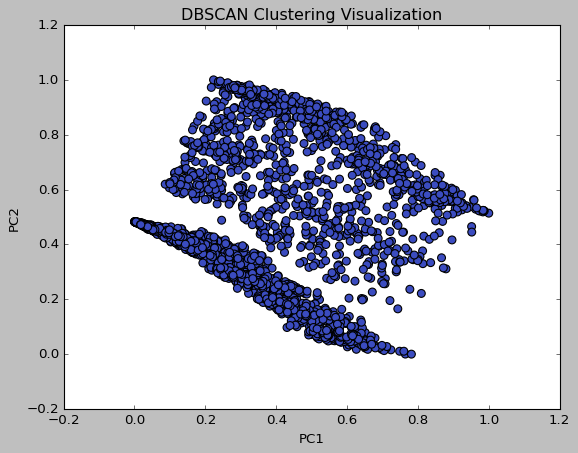

In [82]:
# Visualizing clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_norm["PC1"], pca_norm["PC2"], c=dbscan.labels_, cmap="coolwarm", edgecolors="k", s=50)
plt.title("DBSCAN Clustering Visualization")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [83]:
# DBSCAN model tuning
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Adjusted eps and min_samples
dbscan.fit(pca_norm.iloc[:, :-1])

DBSCAN(eps=1.5)

In [84]:
# Cluster Labels
pca_norm["DBSCAN_cluster"] = dbscan.labels_

In [85]:
# Silhouette Score
sil_score = silhouette_score(pca_norm.iloc[:, :-1], dbscan.labels_)
print("Silhouette Score for DBSCAN:", sil_score)

Silhouette Score for DBSCAN: 0.521386798270056


In [86]:
# Finding the optimal eps using k-distance plot
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(pca_norm.iloc[:, :-2])
distances, indices = nbrs.kneighbors(pca_norm.iloc[:, :-2])

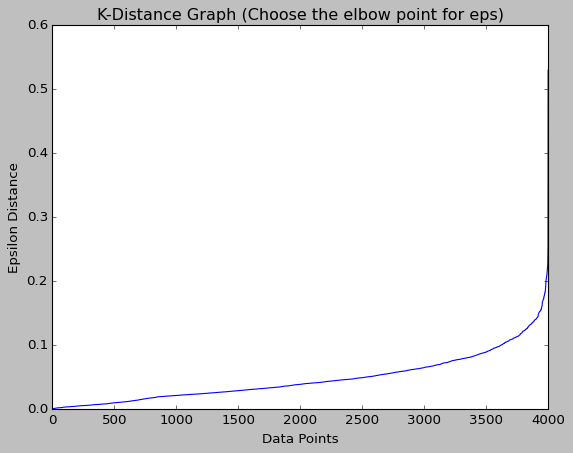

In [87]:
# Sort distances and plot
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.title("K-Distance Graph (Choose the elbow point for eps)")
plt.xlabel("Data Points")
plt.ylabel("Epsilon Distance")
plt.show()

# visualisation

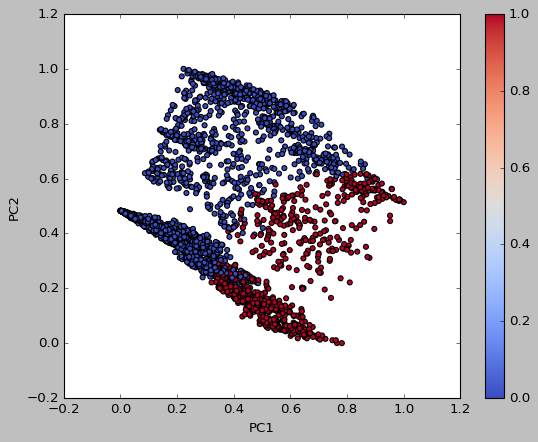

In [88]:
pca_norm.plot(x="PC1", y="PC2", c=dbscan.labels_, kind="scatter", cmap="coolwarm") # Replace 'df' with the correct DataFrame, likely 'pca_norm', and choose relevant columns like "PC1", "PC2" for plotting
plt.show()

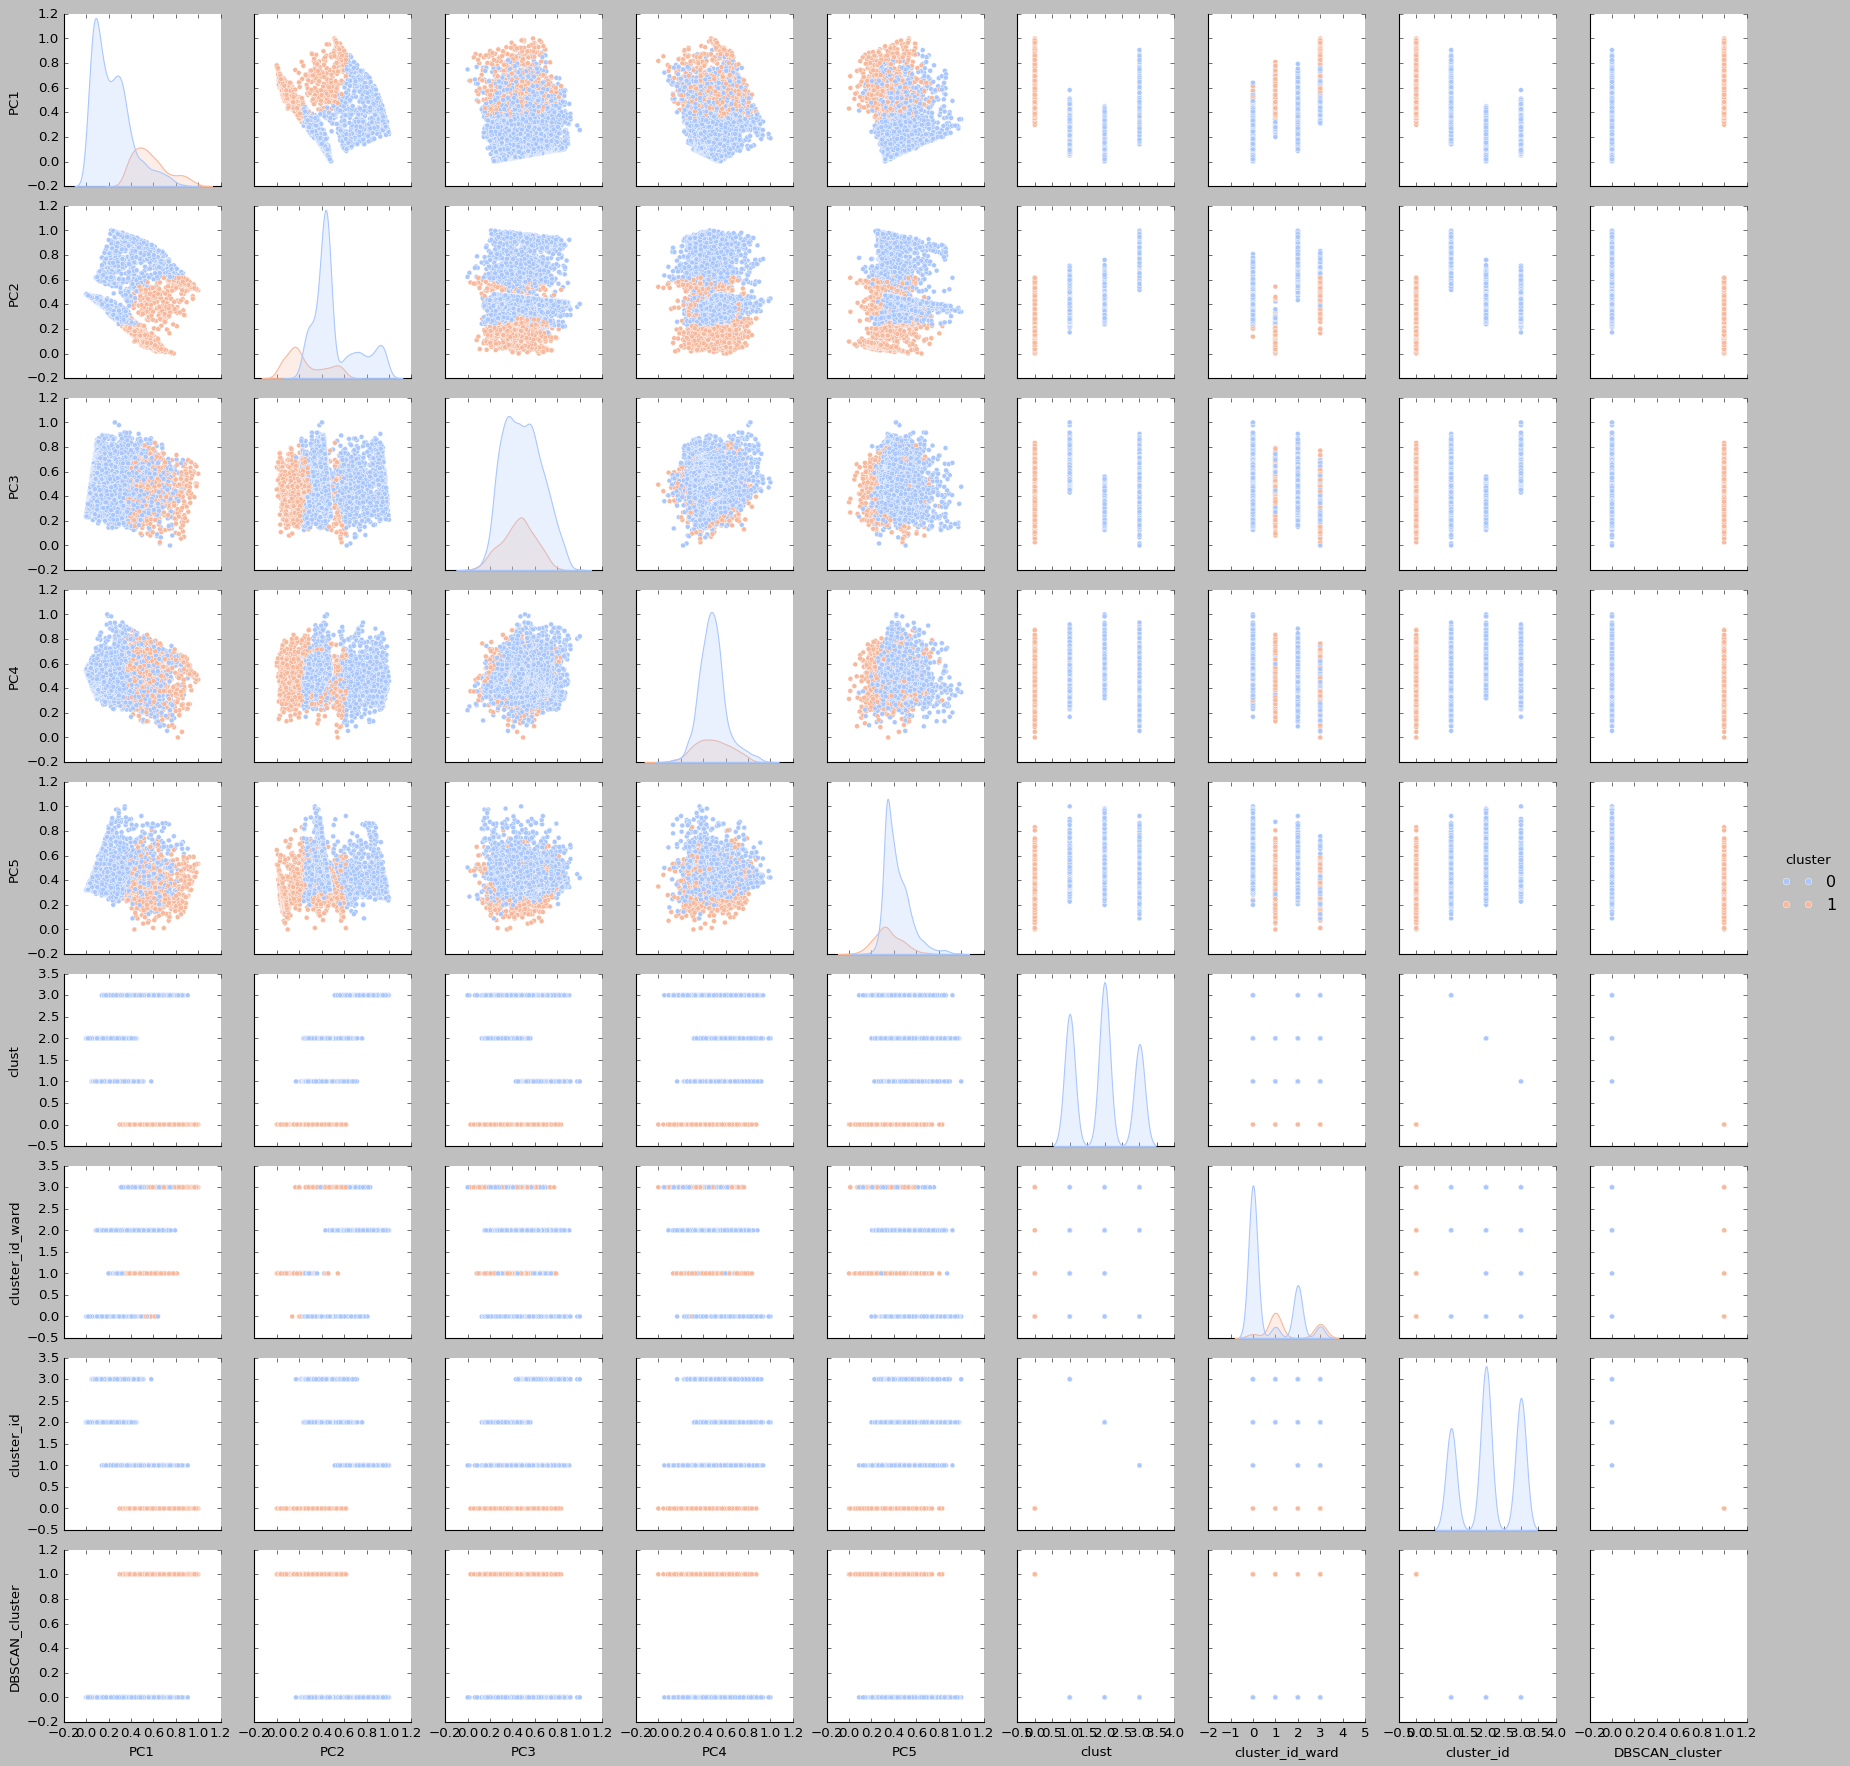

In [89]:
cluster_labels = pd.DataFrame(dbscan.labels_, columns=['cluster'])
sns.pairplot(pd.concat([pca_norm, cluster_labels], axis=1), hue="cluster", palette="coolwarm")
plt.show()

#Final Conclusion

1. **Since K-Means has the highest silhouette score of X, it is the best approach for this dataset.**